In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters
import matplotlib.pyplot as plt

# Obtener datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [3]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get(_-3))
    # pass

550378/550378 [==============================] - 1s 1us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [4]:
train_labels[0]

3

# Transformar datos a tensores

In [5]:
train_data.shape, test_data.shape
# No son tensores

((8982,), (2246,))

In [6]:
def vectorizar(sequences, dim=10000):
    result = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        result[i, sequences]=1
    return result

x_train = vectorizar(train_data)
x_test = vectorizar(test_data)
# Son tensores
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [7]:
from keras.utils import to_categorical
train_labels[5]

4

In [8]:
# Transformar a estructura de tensor
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[5]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Crear red

In [80]:
from keras import regularizers
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # kernel_regularizer=regularizers.l1(0.001)))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # kernel_regularizer=regularizers.l1(0.001)))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(46, activation='softmax')) # softmax -> usado para clasificacion multiple

model1.compile(optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [81]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [82]:
# Entrenamiento de modelo
history = model1.fit(partial_x_train, partial_y_train,
                    epochs=20,                          # Iteraciones
                    batch_size=512,                     # lotes de datos
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 3.3358 - accuracy: 0.2420 - val_loss: 2.5003 - val_accuracy: 0.5680
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 2.3630 - accuracy: 0.4925 - val_loss: 1.7739 - val_accuracy: 0.6060
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.8719 - accuracy: 0.5714 - val_loss: 1.5088 - val_accuracy: 0.6520
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 1.6430 - accuracy: 0.6210 - val_loss: 1.4031 - val_accuracy: 0.6880
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5013 - accuracy: 0.6505 - val_loss: 1.3136 - val_accuracy: 0.6960
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4050 - accuracy: 0.6718 - val_loss: 1.2594 - val_accuracy: 0.7100
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3002 - accuracy: 0.6911 - val_loss: 1.2041 - val_accuracy: 0.7170
Epoch 8/20
16

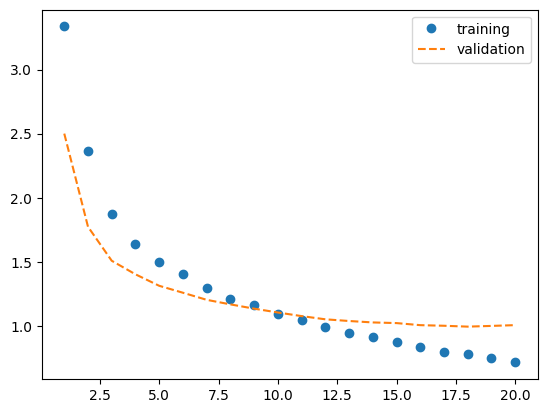

In [83]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(history_dict['loss'])+1)
plt.plot(epoch, history_dict['loss'], 'o', label='training')
plt.plot(epoch, val_loss_values, '--',label='validation')
plt.legend()
plt.show()

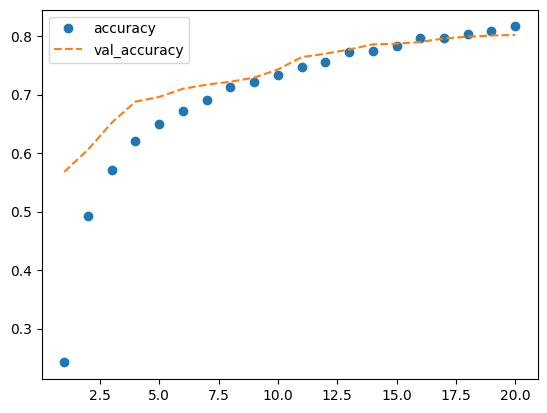

In [84]:
accu_values = history_dict['accuracy']
val_accu_values = history_dict['val_accuracy']

epoch = range(1, len(history_dict['loss'])+1)
plt.plot(epoch, accu_values, 'o', label='accuracy')
plt.plot(epoch, val_accu_values, '--',label='val_accuracy')
plt.legend()
plt.show()

In [85]:
model1.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0779 - accuracy: 0.7676


[1.07787024974823, 0.7675868272781372]

In [86]:
prediction = model1.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [87]:
np.sum(prediction[0])

1.0000001

In [88]:
np.argmax(prediction[0])

3